Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MultiClassLogisticRegression:

    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres
        #This method initializes the logistic regression model with parameters
        #such as the maximum number of iterations (n_iter) and a threshold (thres) for convergence.

    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False):
        np.random.seed(rand_seed)
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
        #This method trains the logistic regression model. It takes input data (X) and corresponding target labels (y)
        #along with optional parameters like batch size (batch_size), learning rate (lr), random seed (rand_seed), and verbosity (verbose).
        # Within this method:It preprocesses the data by adding a bias term to input features and encoding target labels into one-hot vectors.
        #It initializes model weights and iteratively updates them using stochastic gradient descent until convergence or reaching the maximum number of iterations.

    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose:
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
            #This method performs the actual training process using stochastic gradient descent (SGD). It updates model weights based on a randomly selected
            # batch of data points until convergence or reaching the maximum number of iterations.

    def predict(self, X):
        return self.predict_(self.add_bias(X))
        #It predicts the class labels for given input data.

    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
        #It calculates class probabilities for given input data.

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
        #It predicts the class labels based on calculated probabilities.

    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
        #It adds a bias term (intercept) to input features.

    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))
        #It initializes model weights.

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
        #It encodes target labels into one-hot vectors.

    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
        #It calculates the accuracy of predicted class labels against true labels.

    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
        #It calculates the accuracy of predicted class probabilities against true labels.

    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))
        #It computes the cross-entropy loss between predicted probabilities and true labels.


In [ ]:


import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/maindataset/Processed_data1.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
data = df[['essay_set','clean_essay','final_score']].copy()
X = count_vectors.toarray()
y = data['final_score'].to_numpy()

In [ ]:
lr = MultiClassLogisticRegression()
lr.fit(X,y, lr=0.0001)

0.43719173859432797


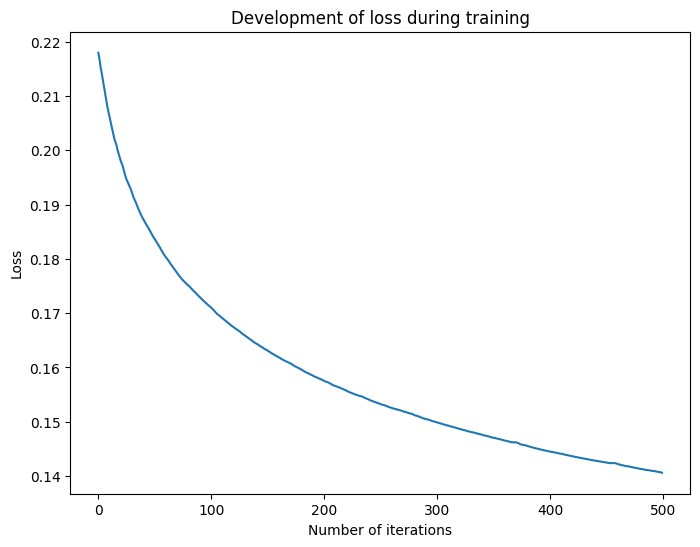

In [ ]:
pre = lr.predict_classes(X)
print(lr.score(X,y))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

# Assuming pre is the predicted classes
accuracy = accuracy_score(y, pre)
qwk_score = cohen_kappa_score(y, pre, weights='quadratic')

print("Accuracy:", accuracy)
print("QWK Score:", qwk_score)


Accuracy: 0.43719173859432797
QWK Score: 0.3600226361772776


model 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MultiClassLogisticRegression:

    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres
        #This method initializes the logistic regression model with parameters
        #such as the maximum number of iterations (n_iter) and a threshold (thres) for convergence.

    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False):
        np.random.seed(rand_seed)
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
        #This method trains the logistic regression model. It takes input data (X) and corresponding target labels (y)
        #along with optional parameters like batch size (batch_size), learning rate (lr), random seed (rand_seed), and verbosity (verbose).
        # Within this method:It preprocesses the data by adding a bias term to input features and encoding target labels into one-hot vectors.
        #It initializes model weights and iteratively updates them using stochastic gradient descent until convergence or reaching the maximum number of iterations.

    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose:
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
            #This method performs the actual training process using stochastic gradient descent (SGD). It updates model weights based on a randomly selected
            # batch of data points until convergence or reaching the maximum number of iterations.

    def predict(self, X):
        return self.predict_(self.add_bias(X))
        #It predicts the class labels for given input data.

    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
        #It calculates class probabilities for given input data.

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
        #It predicts the class labels based on calculated probabilities.

    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
        #It adds a bias term (intercept) to input features.

    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))
        #It initializes model weights.

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
        #It encodes target labels into one-hot vectors.

    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
        #It calculates the accuracy of predicted class labels against true labels.

    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
        #It calculates the accuracy of predicted class probabilities against true labels.

    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))
        #It computes the cross-entropy loss between predicted probabilities and true labels.


In [ ]:


import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/maindataset/Processed_data1.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
data = df[['essay_set','clean_essay','final_score']].copy()
X = count_vectors.toarray()
y = data['final_score'].to_numpy()

In [ ]:
lr = MultiClassLogisticRegression()
lr.fit(X,y, lr=0.0001)

In [ ]:
pre = lr.predict_classes(X)
print(lr.score(X,y))

# fig = plt.figure(figsize=(8,6))
# plt.plot(np.arange(len(lr.loss)), lr.loss)
# plt.title("Development of loss during training")
# plt.xlabel("Number of iterations")
# plt.ylabel("Loss")
# plt.show()

0.43719173859432797


In [ ]:
qwkscore=0.5600226361772776

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, cohen_kappa_score

pre = lr.predict_classes(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, pre)
print('MSE:', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, pre)
print('MAE:', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Calculate R2 Score
r2 = r2_score(y, pre)
print('R2 Score:', r2)

# Calculate Quadratic Weighted Kappa (QWK)
qwk_score = cohen_kappa_score(y, pre, weights='quadratic')
print("QWK Score:", qwk_score)


MSE: 5.383477188655981
MAE: 1.5393033292231812
RMSE: 2.3202321411134665
R2 Score: 0.114688493755564
QWK Score: 0.5600226361772777
